In [1]:
import pymecht as pmt
from matplotlib import pyplot as plt
import numpy as np

In [2]:
intima = pmt.MatModel('nh','goh')
media = pmt.MatModel('nh','goh')
adventitia = pmt.MatModel('nh','goh')

theta1 = 42.85 #degrees
theta2 = 35.01 #degrees
theta3 = 42.78 #degrees

params = intima.parameters
params['mu_0'].set(22.57)
params['k1_1'].set(276.45)
params['k2_1'].set(42.85)
params['k3_1'].set(0.246)
intima.parameters = params

params = media.parameters
params['mu_0'].set(14.30)
params['k1_1'].set(290.22)
params['k2_1'].set(4.87)
params['k3_1'].set(0.224)
media.parameters = params

params = adventitia.parameters
params['mu_0'].set(1.61)
params['k1_1'].set(278.86)
params['k2_1'].set(87.62)
params['k3_1'].set(0.275)
adventitia.parameters = params


In [3]:
tube1 = pmt.TubeInflation(intima,disp_measure='radius',force_measure='pressure')
pmt.specify_two_fibers(tube1,angle=theta1,degrees=True)
params_tube1 = tube1.parameters
print(params_tube1)

Fiber directions set to  42.85  degrees ( 0.7478735844795702  radians)
------------------------------------------------------------------
Keys              Value       Fixed?      Lower bound Upper bound 
------------------------------------------------------------------
Ri                1.00        No          0.50        1.50        
thick             0.10        No          0.00        1.00        
omega             0.00        No          0.00        0.00        
L0                1.00        No          1.00        1.00        
lambdaZ           1.00        No          1.00        1.00        
mu_0              22.57       No          1.00e-04    1.00e+02    
k1_1              2.76e+02    No          0.10        30.00       
k2_1              42.85       No          0.10        30.00       
k3_1              0.25        No          0.00        0.33        
------------------------------------------------------------------



In [4]:
ri0 = 6
omega = np.pi/2.
params_tube1.set('omega',omega)
params_tube1.set('Ri',ri0*2*np.pi/(2*np.pi-omega))
params_tube1.set('thick',0.3)
tube1.force_controlled(0,params_tube1,x0=6)
tube1.force_controlled(np.array([0,10,15]),params_tube1,x0=6)

array([5.95889748, 7.7276288 , 7.89064538])

In [5]:
tube1.parameters

------------------------------------------------------------------
Keys              Value       Fixed?      Lower bound Upper bound 
------------------------------------------------------------------
Ri                8.00        No          0.50        1.50        
thick             0.30        No          0.00        1.00        
omega             1.57        No          0.00        0.00        
L0                1.00        No          1.00        1.00        
lambdaZ           1.00        No          1.00        1.00        
mu_0              22.57       No          1.00e-04    1.00e+02    
k1_1              2.76e+02    No          0.10        30.00       
k2_1              42.85       No          0.10        30.00       
k3_1              0.25        No          0.00        0.33        
------------------------------------------------------------------

In [6]:
tube2 = pmt.TubeInflation(media,disp_measure='radius',force_measure='pressure')
pmt.specify_two_fibers(tube2,angle=theta2,degrees=True)
params_tube2 = tube2.parameters
ri0 = 6
omega = np.pi/2.
params_tube2.set('omega',omega)
params_tube2.set('Ri',ri0*2*np.pi/(2*np.pi-omega))
params_tube2.set('thick',0.54)
tube2.parameters

Fiber directions set to  35.01  degrees ( 0.6110397711232147  radians)


------------------------------------------------------------------
Keys              Value       Fixed?      Lower bound Upper bound 
------------------------------------------------------------------
Ri                8.00        No          0.50        1.50        
thick             0.54        No          0.00        1.00        
omega             1.57        No          0.00        0.00        
L0                1.00        No          1.00        1.00        
lambdaZ           1.00        No          1.00        1.00        
mu_0              14.30       No          1.00e-04    1.00e+02    
k1_1              2.90e+02    No          0.10        30.00       
k2_1              4.87        No          0.10        30.00       
k3_1              0.22        No          0.00        0.33        
------------------------------------------------------------------

In [7]:
tube2.force_controlled([0,10,15],params_tube1,x0=6)

[array([5.95729122]), array([7.52927162]), array([7.6840413])]

In [9]:
tube3 = pmt.TubeInflation(adventitia,disp_measure='radius',force_measure='pressure')
pmt.specify_two_fibers(tube3,angle=theta3,degrees=True)
params_tube3 = tube3.parameters
ri0 = 6
omega = np.pi/2.
params_tube3.set('omega',omega)
params_tube3.set('Ri',ri0*2*np.pi/(2*np.pi-omega))
params_tube3.set('thick',0.16)
tube3.parameters

Fiber directions set to  42.78  degrees ( 0.7466518540031742  radians)


------------------------------------------------------------------
Keys              Value       Fixed?      Lower bound Upper bound 
------------------------------------------------------------------
Ri                8.00        No          0.50        1.50        
thick             0.16        No          0.00        1.00        
omega             1.57        No          0.00        0.00        
L0                1.00        No          1.00        1.00        
lambdaZ           1.00        No          1.00        1.00        
mu_0              1.61        No          1.00e-04    1.00e+02    
k1_1              2.79e+02    No          0.10        30.00       
k2_1              87.62       No          0.10        30.00       
k3_1              0.28        No          0.00        0.33        
------------------------------------------------------------------

In [10]:
artery = pmt.LayeredTube(tube1,tube2,tube3)
artery.parameters

------------------------------------------------------------------
Keys              Value       Fixed?      Lower bound Upper bound 
------------------------------------------------------------------
Ri_layer0         8.00        No          0.50        1.50        
thick_layer0      0.30        No          0.00        1.00        
omega_layer0      1.57        No          0.00        0.00        
L0_layer0         1.00        No          1.00        1.00        
lambdaZ_layer0    1.00        No          1.00        1.00        
mu_0_layer0       22.57       No          1.00e-04    1.00e+02    
k1_1_layer0       2.76e+02    No          0.10        30.00       
k2_1_layer0       42.85       No          0.10        30.00       
k3_1_layer0       0.25        No          0.00        0.33        
Ri_layer1         8.00        No          0.50        1.50        
thick_layer1      0.54        No          0.00        1.00        
omega_layer1      1.57        No          0.00        0.00    

In [11]:
artery.force_controlled(np.array([0,10,15]),x0=6)

array([5.6583947 , 6.75954302, 6.97341844])

In [12]:
xi,stress = artery.cauchy_stress(6.97341844)

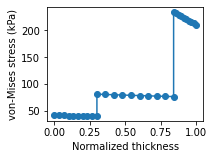

In [13]:
def von_mises(sigma_list):
    return [np.sqrt(3./2.)*np.linalg.norm(sigma-np.trace(sigma)/3.*np.eye(3)) for sigma in sigma_list]

fig,ax = plt.subplots(1,1,figsize=(4*0.7,3*0.7))

ax.plot(xi,von_mises(stress),'-o')
ax.set_xlabel('Normalized thickness')
ax.set_ylabel('von-Mises stress (kPa)')
plt.show()